## Data Preperation:

    missing values imputions
    one hot encoding 
    ordinal encoding
    cardinal encoding
    normalization
    transformation

## Feature Engineering
    Feature interaction
    Polynomial Feature 
    Trignometry feature
    Group feture
    Bin Numeric features
    combine rare levels

## Feature Selections

    Feature importance
    Remove multicollinerity
    PCA
    Ignore low variance

## Init
    Getting Data
    Setting up env
    
## Train
    Compare models
    create models
    tune models
    
## Ensemble
    Ensemble models
    blend models
    stack models

## Analyze
    Plot Model
    interept model
    Assign model
    calibrate model
    optimize threshold
    
## Deploy
    Predict model
    Finalize model
    Deploy model
    Save model
    save expirement

In [3]:
# predefine dataset
from pycaret.datasets import get_data

In [7]:
import pandas as pd

In [9]:
df = pd.read_csv("../Data preparation/Fish-1.csv")

In [10]:
df.shape

(159, 7)

In [12]:
# train test split
data = df.sample(frac=0.80, random_state=786).reset_index(drop=True)
data_unseen = df.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (127, 7)
Unseen Data For Predictions: (32, 7)


In [13]:

from pycaret.classification import *

In [20]:
e = setup(data, session_id=123, target = 'Species')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Multiclass
2,Label Encoded,"Bream: 0, Parkki: 1, Perch: 2, Pike: 3, Roach: 4, Smelt: 5, Whitefish: 6"
3,Original Data,"(127, 7)"
4,Missing Values,False
5,Numeric Features,6
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


## 
session_id :
A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

Target Type : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

Label Encoded : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. In this experiment no label encoding is required since the target variable is of type numeric.

Original Data : Displays the original shape of the dataset. In this experiment (22800, 24) means 22,800 samples and 24 features including the target column.

Missing Values : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

Numeric Features : The number of features inferred as numeric. In this dataset, 14 out of 24 features are inferred as numeric.

Categorical Features : The number of features inferred as categorical. In this dataset, 9 out of 24 features are inferred as categorical.

Transformed Train Set : Displays the shape of the transformed training set. Notice that the original shape of (22800, 24) is transformed into (15959, 91) for the transformed train set and the number of features have increased to 91 from 24 due to categorical encoding

Transformed Test Set : Displays the shape of the transformed test/hold-out set. There are 6841 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

In [21]:

compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Linear Discriminant Analysis,0.8986,0,0.8594,0.8778,0.8782,0.8658
1,Logistic Regression,0.8736,0,0.8333,0.828,0.8431,0.8321
2,Ridge Classifier,0.8306,0,0.73,0.75,0.7762,0.77
3,Ada Boost Classifier,0.7611,0,0.7317,0.7217,0.7302,0.683
4,Extra Trees Classifier,0.7597,0,0.7475,0.7631,0.7397,0.6872
5,CatBoost Classifier,0.75,0,0.7141,0.7267,0.7267,0.6666
6,Quadratic Discriminant Analysis,0.7486,0,0.6478,0.6388,0.6785,0.6546
7,Gradient Boosting Classifier,0.7389,0,0.6937,0.6793,0.6973,0.6511
8,Extreme Gradient Boosting,0.7167,0,0.6515,0.6543,0.673,0.6175
9,Random Forest Classifier,0.6931,0,0.6197,0.6271,0.6488,0.5932


In [22]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.5556,0.0,0.4722,0.6481,0.5704,0.4545
1,0.5556,0.0,0.5556,0.6111,0.5778,0.4783
2,0.5556,0.0,0.7000,0.4815,0.5000,0.4000
3,0.7778,0.0,0.7500,0.9444,0.8148,0.7231
4,0.7778,0.0,0.8611,0.9259,0.8037,0.7313
5,0.5556,0.0,0.4444,0.5556,0.5556,0.4375
6,0.7778,0.0,0.6429,0.8056,0.7672,0.7188
7,0.7778,0.0,0.5714,0.7778,0.7778,0.7273
8,0.7500,0.0,0.5000,0.7500,0.7500,0.6735
9,0.5000,0.0,0.5000,0.5000,0.5000,0.4074


In [23]:
#trained model object is stored in the variable 'dt'. 
print(dt)


OneVsRestClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=123,
                                        

In [24]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.4444,0.0,0.3667,0.4167,0.3915,0.2373
1,0.2222,0.0,0.2222,0.1389,0.1693,0.0308
2,0.6667,0.0,0.7500,0.5444,0.5926,0.5263
3,0.5556,0.0,0.6000,0.5556,0.5317,0.4098
4,0.3333,0.0,0.2778,0.2444,0.2778,0.1148
5,0.6667,0.0,0.6111,0.6111,0.6296,0.5781
6,0.5556,0.0,0.5278,0.5000,0.4868,0.4286
7,0.5556,0.0,0.4524,0.5556,0.5238,0.4375
8,0.3750,0.0,0.3667,0.2708,0.3083,0.1489
9,0.2500,0.0,0.2500,0.1250,0.1625,0.0769


In [25]:

rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.5556,0.0,0.4444,0.4444,0.4868,0.4286
1,0.4444,0.0,0.3889,0.4444,0.4444,0.2857
2,0.5556,0.0,0.7000,0.4815,0.5000,0.4000
3,0.8889,0.0,0.8000,0.8000,0.8395,0.8364
4,0.8889,0.0,0.7857,1.0000,0.9259,0.8636
5,0.6667,0.0,0.6111,0.5370,0.5852,0.5714
6,0.7778,0.0,0.6667,0.6444,0.6944,0.7000
7,0.7778,0.0,0.6667,0.6944,0.7302,0.7097
8,0.7500,0.0,0.6000,0.6000,0.6562,0.6364
9,0.6250,0.0,0.5333,0.6250,0.6250,0.5000


## Tune a Model

In [26]:
tuned_dt = tune_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.4444,0.0,0.3333,0.2593,0.3259,0.2105
1,0.6667,0.0,0.7333,0.6111,0.6349,0.5574
2,0.8889,0.0,0.9500,0.9444,0.8995,0.8525
3,0.7778,0.0,0.7500,0.7778,0.7778,0.6897
4,0.6667,0.0,0.5952,0.7778,0.7037,0.5970
5,0.6667,0.0,0.6111,0.5556,0.5979,0.5645
6,0.6667,0.0,0.6111,0.6111,0.6349,0.5645
7,1.0000,0.0,1.0000,1.0000,1.0000,1.0000
8,0.7500,0.0,0.6000,0.6562,0.6964,0.6522
9,0.7500,0.0,0.7333,0.7500,0.7500,0.6667


In [27]:
#tuned model object is stored in the variable 'tuned_dt'. 
print(tuned_dt)

OneVsRestClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=3,
                                                     max_features=3,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=3,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=123,
                                              

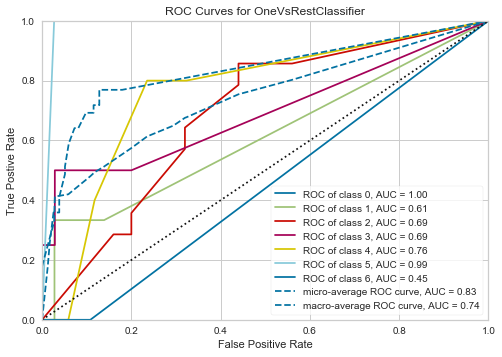

In [29]:

plot_model(tuned_dt, plot = 'auc')

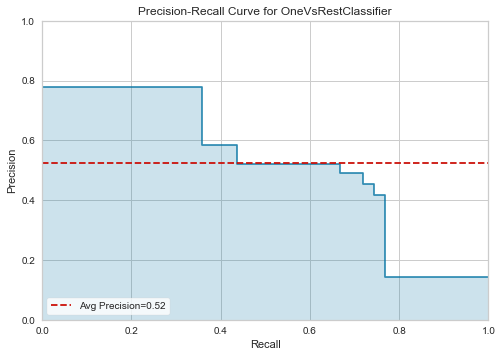

In [30]:
plot_model(tuned_dt, plot = 'pr')

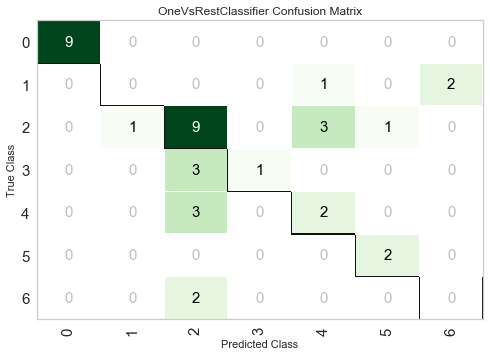

In [37]:
plot_model(tuned_dt, plot = 'confusion_matrix')

In [38]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [39]:
predict_model(tuned_dt);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,One Vs Rest Classifier,0.5897,0,0.4704,0.6003,0.5679,0.4597


In [42]:
final_dt = finalize_model(tuned_dt)

In [43]:
print(final_dt)

OneVsRestClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=3,
                                                     max_features=3,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=3,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=123,
                                              

In [44]:
predict_model(final_dt);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,One Vs Rest Classifier,0.8462,0,0.735,0.8216,0.8256,0.7986


In [45]:

unseen_predictions = predict_model(final_dt, data=data_unseen)
unseen_predictions.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,Label,Score
0,Perch,1000.0,41.1,44.0,46.6,12.4888,7.5958,2,0.9198
1,Pike,200.0,30.0,32.3,34.8,5.5680,3.3756,4,0.5808
2,Pike,300.0,31.7,34.0,37.8,5.7078,4.1580,3,0.5758
3,Pike,300.0,32.7,35.0,38.8,5.9364,4.3844,3,0.5758
4,Pike,300.0,34.8,37.3,39.8,6.2884,4.0198,3,0.5758


#The Label and Score columns are added onto the data_unseen set. Label is the prediction and score is the probability of the prediction. Notice that predicted results are concatenated to the original dataset while all the transformations are automatically performed in the background.

In [47]:

save_model(final_dt,'Final DT Model 08Feb2020')

Transformation Pipeline and Model Succesfully Saved


In [48]:
#loading saved model

saved_final_dt = load_model('Final DT Model 08Feb2020')

Transformation Pipeline and Model Sucessfully Loaded


In [49]:

new_prediction = predict_model(saved_final_dt, data=data_unseen)

In [50]:

new_prediction.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,Label,Score
0,Perch,1000.0,41.1,44.0,46.6,12.4888,7.5958,2,0.9198
1,Pike,200.0,30.0,32.3,34.8,5.5680,3.3756,4,0.5808
2,Pike,300.0,31.7,34.0,37.8,5.7078,4.1580,3,0.5758
3,Pike,300.0,32.7,35.0,38.8,5.9364,4.3844,3,0.5758
4,Pike,300.0,34.8,37.3,39.8,6.2884,4.0198,3,0.5758
